# Accelerating Cleantech Advancements through NLP-Powered Text Mining and Knowledge Extraction

Group: Marusa Storman, Vignesh Govindaraj, Pradip Ravichandran

## Stage 1: Enhanced Data Cleaning, Preprocessing, and Exploratory Analysis

### Load Data

In [1]:
import sys
import os

# Get the directory of the current notebook
notebook_dir = os.getcwd()

# Change current working directory to where the notebook resides
os.chdir(notebook_dir)

# List of required libraries
required_libraries = [
    'wordcloud'
]

# Check if each library is installed, if not, install it
for lib in required_libraries:
    try:
        __import__(lib)
    except ImportError:
        print(f"Installing {lib}...")
        !"{sys.executable}" -m pip install {lib}

In [2]:
import matplotlib.pyplot as plt
#import nltk
# import numpy as np
import pandas as pd
import seaborn as sns

from wordcloud import WordCloud

# Jupyter config
%config InteractiveShell.ast_node_interactivity = 'all'

# Additional setup for seaborn
sns.set(color_codes=True)
sns.set_style("whitegrid")

# Download needed NLTK's resources
# nltk.download('punkt')
# nltk.download('stopwords')

In [3]:
google_patent_complete = pd.read_csv("Data/lang/google_patent_all.csv")
google_patent = google_patent_complete.drop(columns=['cpc_code', 'inventor'], axis=1)
google_patent = google_patent_complete.drop_duplicates()

google_patent_en_complete = pd.read_csv("Data/lang/google_patent_en.csv")
google_patent_en = google_patent_en_complete.drop(columns=['cpc_code', 'inventor'], axis=1)
google_patent_en = google_patent_en.drop_duplicates()

ct_media = pd.read_csv("Data/ct_evaluation.csv")
ct_evaluation = pd.read_csv("Data/ct_evaluation.csv")

### Exploratory Data Analysis

#### Google patent

##### Language

In [4]:
abstract_lang_distribution = google_patent['abstract_localized_language'].value_counts().reset_index()
title_lang_distribution = google_patent['title_localized_language'].value_counts().reset_index()

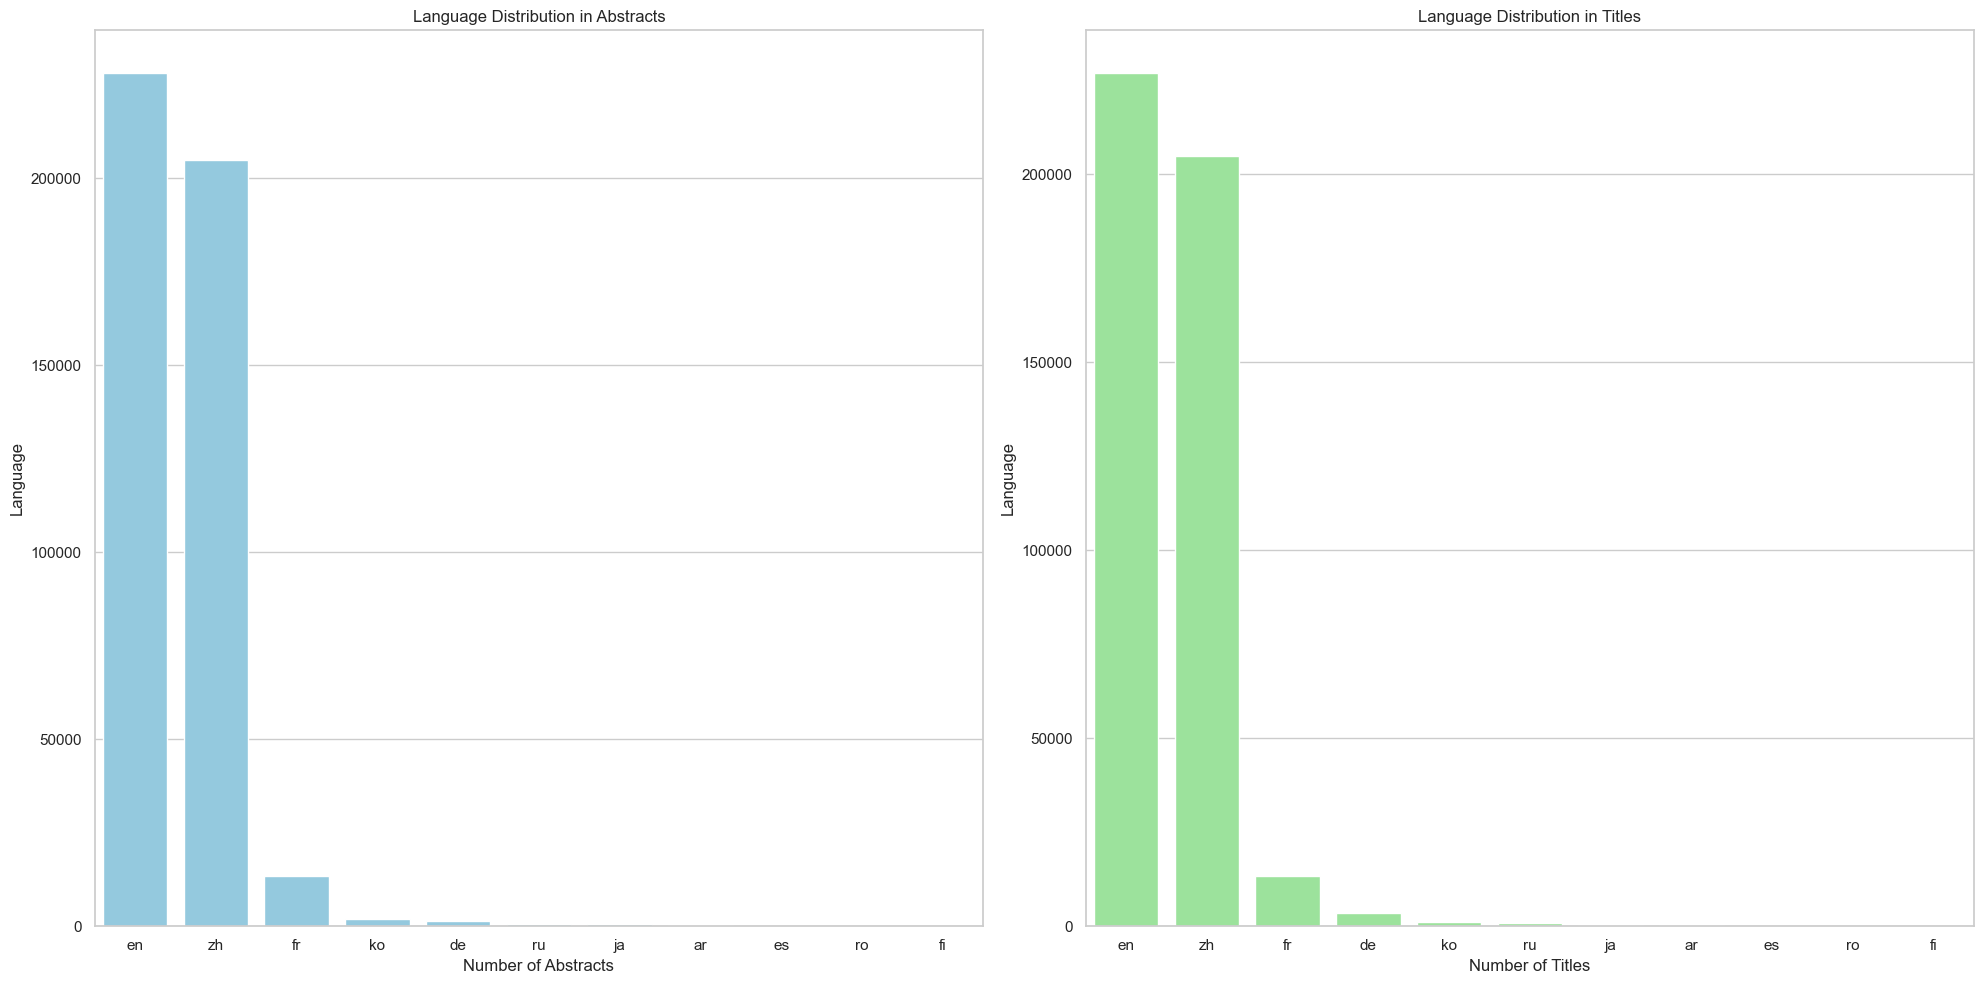

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot for language distribution in abstracts
sns.barplot(ax=axes[0], x=[item[0] for item in abstract_lang_distribution.values], 
            y=[item[1] for item in abstract_lang_distribution.values], color='skyblue')
axes[0].set_title('Language Distribution in Abstracts')
axes[0].set_xlabel('Number of Abstracts')
axes[0].set_ylabel('Language')

# Plot for language distribution in titles
sns.barplot(ax=axes[1], x=[item[0] for item in title_lang_distribution.values], 
            y=[item[1] for item in title_lang_distribution.values], color='lightgreen')
axes[1].set_title('Language Distribution in Titles')
axes[1].set_xlabel('Number of Titles')
axes[1].set_ylabel('Language')

plt.tight_layout()
plt.show();

##### Country

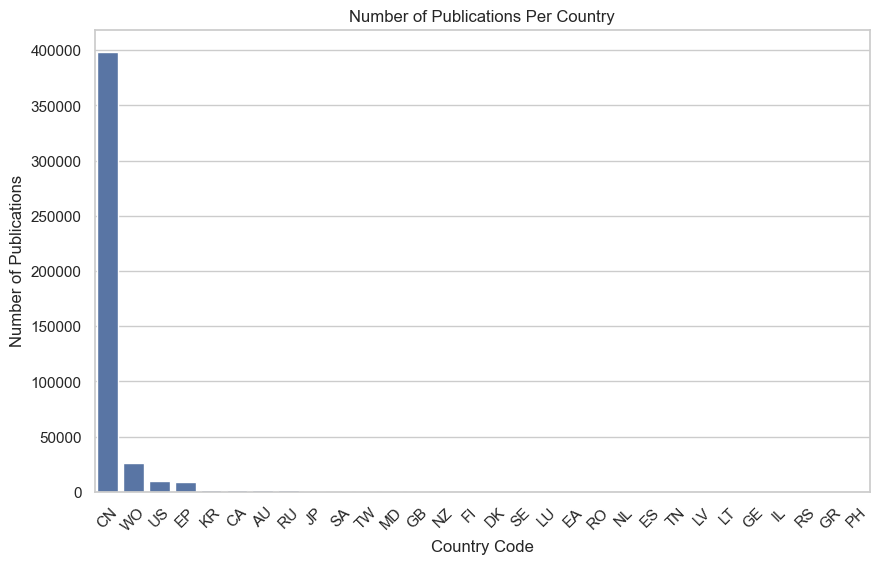

In [6]:
# Bar chart for publications per country
plt.figure(figsize=(10, 6))
sns.countplot(data=google_patent, x='country_code', order=google_patent['country_code'].value_counts().index)
plt.title('Number of Publications Per Country')
plt.xlabel('Country Code')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.show();

##### Inventor

In [7]:
google_patent_inventor = google_patent_en_complete.drop(columns=['cpc_code'], axis=1)
google_patent_inventor = google_patent_inventor.drop_duplicates()

# Group by 'publication_number' and aggregate other columns to count entries
grouped = google_patent_inventor.groupby('publication_number').agg({col: lambda x: x.dropna().nunique() for col in ['inventor']}).reset_index()

# Get the value counts for 'publication_number' and merge it with the grouped DataFrame
grouped = grouped.merge(google_patent_en['publication_number'].value_counts().rename('publication_count').reset_index(), on='publication_number', how='left')

# Display the resulting DataFrame
grouped

,publication_number,inventor,publication_count
0,AU-2016208290-B2,1,1
1,AU-2016321918-B2,2,1
2,AU-2017246326-B2,1,1
3,AU-2017267740-B2,2,1
4,AU-2017276466-B2,1,1
...,...,...,...
13403,WO-2022150919-A1,3,3
13404,WO-2022152757-A1,1,5
13405,WO-2022152759-A2,1,5
13406,WO-2022154333-A1,1,5


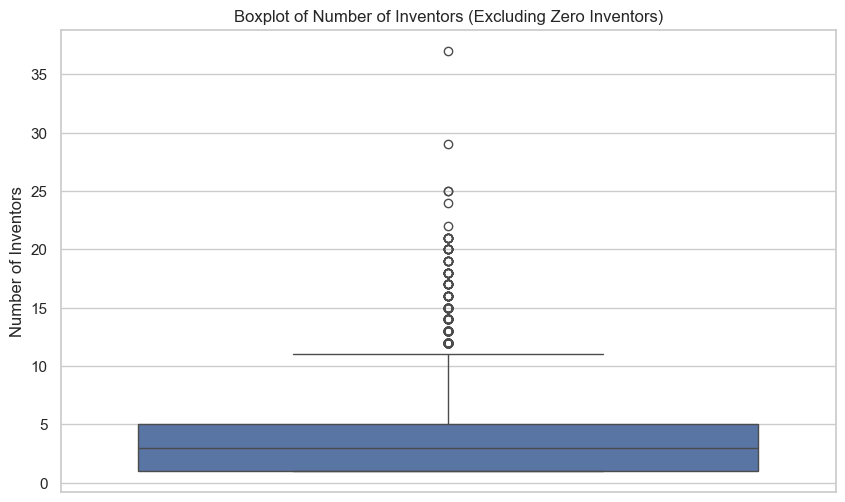

In [8]:
# Boxplot for number of inventors
# Exclude rows with zero inventors.
filtered_data = grouped[grouped['inventor'] > 0]

# Now, we can create a boxplot for the number of inventors.
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, y='inventor')
plt.title('Boxplot of Number of Inventors (Excluding Zero Inventors)')
plt.ylabel('Number of Inventors')
plt.show();

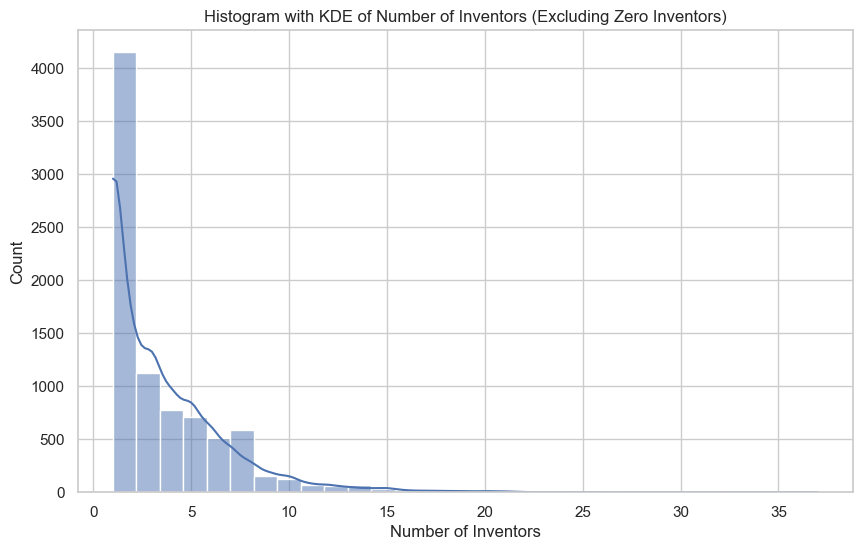

In [9]:
# Kernel Density Estimate (KDE) plot
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['inventor'], bins=30, kde=True)
plt.title('Histogram with KDE of Number of Inventors (Excluding Zero Inventors)')
plt.xlabel('Number of Inventors')
plt.ylabel('Count')
plt.show();

##### Text analyses

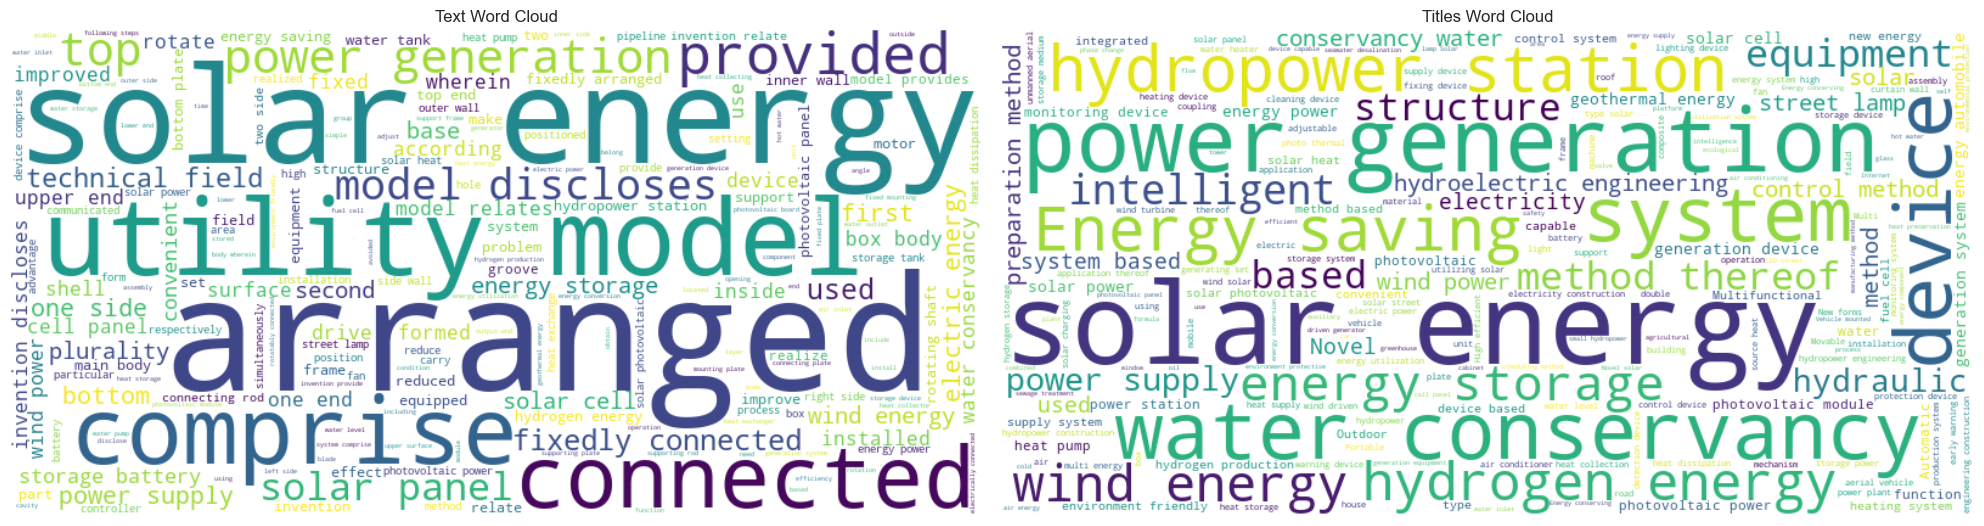

In [10]:
# Combine texts from abstracts and titles into separate strings
abstract_text = ' '.join(google_patent_en['abstract_localized_text'].tolist())
title_text = ' '.join(google_patent_en['title_localized_text'].tolist())

# Create word cloud objects
abstract_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(abstract_text)
title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(title_text)

# Setup matplotlib figures
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Display the word clouds
axes[0].imshow(abstract_wordcloud, interpolation='bilinear')
axes[0].set_title('Text Word Cloud')
axes[0].axis('off')  # Hide the axes for abstract word cloud

axes[1].imshow(title_wordcloud, interpolation='bilinear')
axes[1].set_title('Titles Word Cloud')
axes[1].axis('off')  # Hide the axes for title word cloud

plt.tight_layout()
plt.show();

#### Cleantech Media

##### Text analyses

#### Cleantech Media Evalution

##### Text analyses

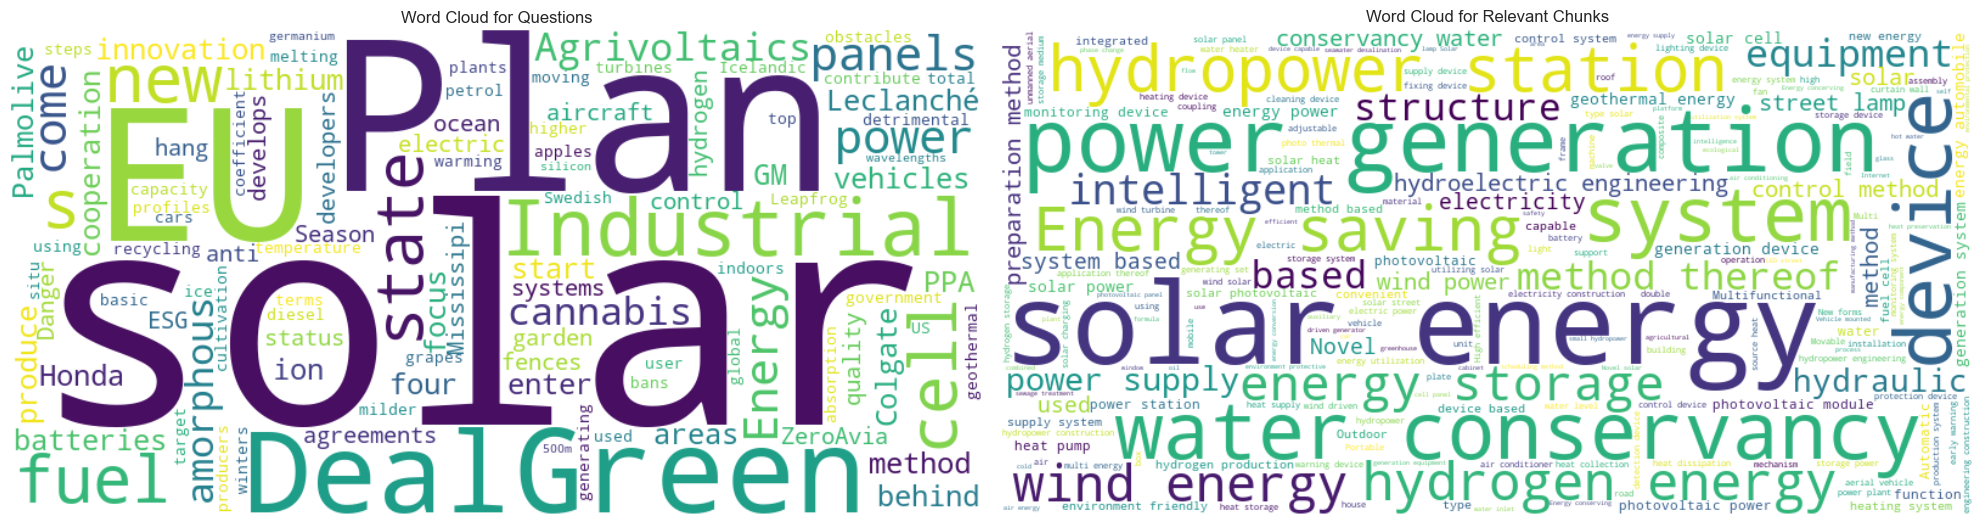

In [13]:
# Generate word cloud for questions
wordcloud_question = WordCloud(width = 800, height = 400, background_color ='white').generate(' '.join(ct_evaluation['question']))
wordcloud_chunk = WordCloud(width = 800, height = 400, background_color ='white').generate(' '.join(ct_evaluation['relevant_chunk']))

# Setup matplotlib figures
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Display the word clouds
axes[0].imshow(wordcloud_question, interpolation='bilinear')
axes[0].set_title('Word Cloud for Questions')
axes[0].axis('off')  # Hide the axes for abstract word cloud

axes[1].imshow(title_wordcloud, interpolation='bilinear')
axes[1].set_title('Word Cloud for Relevant Chunks')
axes[1].axis('off')  # Hide the axes for title word cloud

plt.tight_layout()
plt.show();